# Preliminaries

In [1]:
# ! pip install yellowbrick

In [2]:
# ! pip install kneed

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.manifold import TSNE

from scipy.interpolate import interp1d
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,  davies_bouldin_score
from scipy.spatial.distance import cdist
from kneed import KneeLocator

from tqdm import tqdm

# Data Preprocessing

In [4]:
df = pd.read_csv('E:\Documents\Google Drive\Eskwelabs\Sprint 5 - Capstone\data\consolidated_csv_03SNGAB_G01.csv')
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,PRICE1,...,RR_BREAK_QUANTITY3,RR_UP3,RR_DOWN3,RR_BREAK_QUANTITY4,RR_UP4,RR_DOWN4,RR_BREAK_QUANTITY5,RR_UP5,RR_DOWN5,Unnamed: 46
0,06/26/2021,RTD,CLUZ,SLUZON,03SNGAB_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,FNPC,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,RTD,CLUZ,SLUZON,03SNGAB_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,FNPC,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,RTD,CLUZ,SLUZON,03SNGAB_G01,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,FNPC,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,RTD,CLUZ,SLUZON,03SNGAB_G01,06/26/2021 12:20:00 AM,06/26/2021 12:15:00 AM,06/26/2021 12:20:00 AM,FNPC,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,RTD,CLUZ,SLUZON,03SNGAB_G01,06/26/2021 12:25:00 AM,06/26/2021 12:20:00 AM,06/26/2021 12:25:00 AM,FNPC,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.iloc[108770:108775]

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,PRICE1,...,RR_BREAK_QUANTITY3,RR_UP3,RR_DOWN3,RR_BREAK_QUANTITY4,RR_UP4,RR_DOWN4,RR_BREAK_QUANTITY5,RR_UP5,RR_DOWN5,Unnamed: 46
108770,9/28/2022 7:15:00 AM,RTD,CLUZ,SLUZON,03SNGAB_G01,9/28/2022 7:20:00 AM,9/28/2022 7:15:00 AM,9/28/2022 7:20:00 AM,FNPC,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108771,9/28/2022 7:20:00 AM,RTD,CLUZ,SLUZON,03SNGAB_G01,9/28/2022 7:25:00 AM,9/28/2022 7:20:00 AM,9/28/2022 7:25:00 AM,FNPC,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108772,9/28/2022 7:25:00 AM,RTD,CLUZ,SLUZON,03SNGAB_G01,9/28/2022 7:30:00 AM,9/28/2022 7:25:00 AM,9/28/2022 7:30:00 AM,FNPC,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108773,9/28/2022 7:30:00 AM,RTD,CLUZ,SLUZON,03SNGAB_G01,9/28/2022 7:35:00 AM,9/28/2022 7:30:00 AM,9/28/2022 7:35:00 AM,FNPC,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108774,9/28/2022 7:35:00 AM,RTD,CLUZ,SLUZON,03SNGAB_G01,9/28/2022 7:40:00 AM,9/28/2022 7:35:00 AM,9/28/2022 7:40:00 AM,FNPC,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping of columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199707 entries, 0 to 199706
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   RUN_TIME            199707 non-null  object 
 1   MKT_TYPE            199707 non-null  object 
 2   REGION_NAME         199707 non-null  object 
 3   ZONE_NAME           199707 non-null  object 
 4   RESOURCE_NAME       199707 non-null  object 
 5   TIME_INTERVAL       199707 non-null  object 
 6   START_TIME          199707 non-null  object 
 7   END_TIME            199707 non-null  object 
 8   MP_NAME             195183 non-null  object 
 9   PRICE1              199707 non-null  float64
 10  QUANTITY1           199707 non-null  float64
 11  PRICE2              199707 non-null  float64
 12  QUANTITY2           199707 non-null  float64
 13  PRICE3              180118 non-null  float64
 14  QUANTITY3           180118 non-null  float64
 15  PRICE4              174406 non-nul

In [7]:
# Define the columns containing price-quantity pairs and timestamps
price_columns = [f'PRICE{i}' for i in range(1, 12)]
quantity_columns = [f'QUANTITY{i}' for i in range(1, 12)]

# Corrected line with tuple comprehension
selected_columns = ['RUN_TIME'] + [price for price in price_columns] + [quantity for quantity in quantity_columns]

In [8]:
# Apply the selection to the filtered DataFrame
result_df = df[selected_columns]
result_df

,RUN_TIME,PRICE1,PRICE2,PRICE3,PRICE4,PRICE5,PRICE6,PRICE7,PRICE8,PRICE9,...,QUANTITY2,QUANTITY3,QUANTITY4,QUANTITY5,QUANTITY6,QUANTITY7,QUANTITY8,QUANTITY9,QUANTITY10,QUANTITY11
0,06/26/2021,-10000.0,-10000.0,0.0,4555.4,NaN,NaN,NaN,NaN,NaN,...,210.0,211.0,416.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,0.0,4555.4,NaN,NaN,NaN,NaN,NaN,...,210.0,211.0,416.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,0.0,4555.4,NaN,NaN,NaN,NaN,NaN,...,210.0,211.0,416.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,0.0,4555.4,NaN,NaN,NaN,NaN,NaN,...,210.0,211.0,416.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,0.0,4555.4,NaN,NaN,NaN,NaN,NaN,...,210.0,211.0,416.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199702,09/25/2023 11:35:00 PM,-10000.0,-10000.0,-9999.0,4386.2,NaN,NaN,NaN,NaN,NaN,...,210.0,211.0,408.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199703,09/25/2023 11:40:00 PM,-10000.0,-10000.0,-9999.0,4386.2,NaN,NaN,NaN,NaN,NaN,...,210.0,211.0,408.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199704,09/25/2023 11:45:00 PM,-10000.0,-10000.0,-9999.0,4386.2,NaN,NaN,NaN,NaN,NaN,...,210.0,211.0,408.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199705,09/25/2023 11:50:00 PM,-10000.0,-10000.0,-9999.0,4386.2,NaN,NaN,NaN,NaN,NaN,...,210.0,211.0,408.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df[selected_columns].describe()

,PRICE1,PRICE2,PRICE3,PRICE4,PRICE5,PRICE6,PRICE7,PRICE8,PRICE9,PRICE10,...,QUANTITY2,QUANTITY3,QUANTITY4,QUANTITY5,QUANTITY6,QUANTITY7,QUANTITY8,QUANTITY9,QUANTITY10,QUANTITY11
count,199707.000000,199707.000000,180118.000000,174406.000000,21.000000,0.0,0.0,0.0,0.0,0.0,...,199707.000000,180118.000000,174406.000000,2.100000e+01,0.0,0.0,0.0,0.0,0.0,0.0
mean,-9998.347579,-9998.347579,-9427.204674,4493.822373,8949.257143,NaN,NaN,NaN,NaN,NaN,...,209.101405,211.478742,405.479837,4.163000e+02,NaN,NaN,NaN,NaN,NaN,NaN
std,128.536221,128.536221,2331.702401,1991.721324,2219.655427,NaN,NaN,NaN,NaN,NaN,...,11.745068,9.846684,33.083794,5.824717e-14,NaN,NaN,NaN,NaN,NaN,NaN
min,-10000.000000,-10000.000000,-9999.000000,0.000000,4483.600000,NaN,NaN,NaN,NaN,NaN,...,1.000000,66.000000,216.500000,4.163000e+02,NaN,NaN,NaN,NaN,NaN,NaN
25%,-10000.000000,-10000.000000,-9999.000000,3953.200000,10000.000000,NaN,NaN,NaN,NaN,NaN,...,210.000000,211.000000,411.900000,4.163000e+02,NaN,NaN,NaN,NaN,NaN,NaN
50%,-10000.000000,-10000.000000,-9999.000000,4460.200000,10000.000000,NaN,NaN,NaN,NaN,NaN,...,210.000000,211.000000,416.200000,4.163000e+02,NaN,NaN,NaN,NaN,NaN,NaN
75%,-10000.000000,-10000.000000,-9999.000000,5138.000000,10000.000000,NaN,NaN,NaN,NaN,NaN,...,210.000000,211.000000,416.500000,4.163000e+02,NaN,NaN,NaN,NaN,NaN,NaN
max,0.000000,0.000000,29000.000000,15000.000000,10000.000000,NaN,NaN,NaN,NaN,NaN,...,300.000000,420.000000,420.000000,4.163000e+02,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#change Uppercase to lowercase
result_df.columns = result_df.columns.str.lower()

## FFill NaNs with last Price-Quantity Bid

In [11]:
# Forward fill from the first non-null value in each row for the price columns
result_df.loc[:, 'price1':'price11'] = result_df.loc[:, 'price1':'price11'].apply(lambda row: row.ffill(), axis=1)

# Forward fill from the first non-null value in each row for the quantity columns
result_df.loc[:, 'quantity1':'quantity11'] = result_df.loc[:, 'quantity1':'quantity11'].apply(lambda row: row.ffill(), axis=1)

## TAKES 30 SECONDS TO RUN
result_df

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,06/26/2021,-10000.0,-10000.0,0.0,4555.4,4555.4,4555.4,4555.4,4555.4,4555.4,...,210.0,211.0,416.5,416.5,416.5,416.5,416.5,416.5,416.5,416.5
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,0.0,4555.4,4555.4,4555.4,4555.4,4555.4,4555.4,...,210.0,211.0,416.5,416.5,416.5,416.5,416.5,416.5,416.5,416.5
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,0.0,4555.4,4555.4,4555.4,4555.4,4555.4,4555.4,...,210.0,211.0,416.5,416.5,416.5,416.5,416.5,416.5,416.5,416.5
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,0.0,4555.4,4555.4,4555.4,4555.4,4555.4,4555.4,...,210.0,211.0,416.5,416.5,416.5,416.5,416.5,416.5,416.5,416.5
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,0.0,4555.4,4555.4,4555.4,4555.4,4555.4,4555.4,...,210.0,211.0,416.5,416.5,416.5,416.5,416.5,416.5,416.5,416.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199702,09/25/2023 11:35:00 PM,-10000.0,-10000.0,-9999.0,4386.2,4386.2,4386.2,4386.2,4386.2,4386.2,...,210.0,211.0,408.6,408.6,408.6,408.6,408.6,408.6,408.6,408.6
199703,09/25/2023 11:40:00 PM,-10000.0,-10000.0,-9999.0,4386.2,4386.2,4386.2,4386.2,4386.2,4386.2,...,210.0,211.0,408.6,408.6,408.6,408.6,408.6,408.6,408.6,408.6
199704,09/25/2023 11:45:00 PM,-10000.0,-10000.0,-9999.0,4386.2,4386.2,4386.2,4386.2,4386.2,4386.2,...,210.0,211.0,408.6,408.6,408.6,408.6,408.6,408.6,408.6,408.6
199705,09/25/2023 11:50:00 PM,-10000.0,-10000.0,-9999.0,4386.2,4386.2,4386.2,4386.2,4386.2,4386.2,...,210.0,211.0,408.6,408.6,408.6,408.6,408.6,408.6,408.6,408.6


## Filter to 2022 data

In [12]:
result_df['run_time'] = result_df['run_time'].astype(str)

C:\Users\Gaea\AppData\Local\Temp\ipykernel_39068\2012798107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['run_time'] = result_df['run_time'].astype(str)


In [13]:
#df_2022 = result_df[result_df['run_time'].str[6:10]=='2022']
df_2022 = result_df[result_df['run_time'].str.contains('2022')]
df_2022.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
37239,01/01/2022,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0
37240,01/01/2022 12:05:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0
37241,01/01/2022 12:10:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0
37242,01/01/2022 12:15:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0
37243,01/01/2022 12:20:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0


In [14]:
df_2022.describe()

,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
count,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,...,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000
mean,-9999.046539,-9999.046539,-9986.360382,1647.582336,1647.582336,1647.582336,1647.582336,1647.582336,1647.582336,1647.582336,...,209.195603,210.747382,362.355224,362.355224,362.355224,362.355224,362.355224,362.355224,362.355224,362.355224
std,97.641166,97.641166,465.395847,6633.896936,6633.896936,6633.896936,6633.896936,6633.896936,6633.896936,6633.896936,...,11.165797,16.653365,88.671892,88.671892,88.671892,88.671892,88.671892,88.671892,88.671892,88.671892
min,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-10000.000000,-10000.000000,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,210.000000,211.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
50%,-10000.000000,-10000.000000,-9999.000000,4754.100000,4754.100000,4754.100000,4754.100000,4754.100000,4754.100000,4754.100000,...,210.000000,211.000000,411.900000,411.900000,411.900000,411.900000,411.900000,411.900000,411.900000,411.900000
75%,-10000.000000,-10000.000000,-9999.000000,5247.900000,5247.900000,5247.900000,5247.900000,5247.900000,5247.900000,5247.900000,...,210.000000,211.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
max,0.000000,0.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,...,300.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000


## Normalize quantity values

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Extract only the quantity columns for normalization
quantity_columns = [f'quantity{i}' for i in range(1, 12)]

# Flatten the DataFrame and extract only quantity columns
flattened_quantities = df_2022[quantity_columns].values.flatten()

# Reshape the flattened quantities to a column vector
flattened_quantities = flattened_quantities.reshape(-1, 1)

# Use MinMaxScaler on the flattened quantities
scaler = MinMaxScaler()
scaled_quantities = scaler.fit_transform(flattened_quantities)

# Reshape the scaled quantities to match the original DataFrame shape
scaled_quantities = scaled_quantities.reshape(df_2022[quantity_columns].shape)

# Update the DataFrame with the scaled values
df_2022.loc[:, quantity_columns] = scaled_quantities

In [16]:
df_2022.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
37239,01/01/2022,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
37240,01/01/2022 12:05:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
37241,01/01/2022 12:10:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
37242,01/01/2022 12:15:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
37243,01/01/2022 12:20:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [17]:
df_2022.describe()

,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
count,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,...,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000,94393.000000
mean,-9999.046539,-9999.046539,-9986.360382,1647.582336,1647.582336,1647.582336,1647.582336,1647.582336,1647.582336,1647.582336,...,0.498085,0.501779,0.862751,0.862751,0.862751,0.862751,0.862751,0.862751,0.862751,0.862751
std,97.641166,97.641166,465.395847,6633.896936,6633.896936,6633.896936,6633.896936,6633.896936,6633.896936,6633.896936,...,0.026585,0.039651,0.211124,0.211124,0.211124,0.211124,0.211124,0.211124,0.211124,0.211124
min,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381
25%,-10000.000000,-10000.000000,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.502381,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286
50%,-10000.000000,-10000.000000,-9999.000000,4754.100000,4754.100000,4754.100000,4754.100000,4754.100000,4754.100000,4754.100000,...,0.500000,0.502381,0.980714,0.980714,0.980714,0.980714,0.980714,0.980714,0.980714,0.980714
75%,-10000.000000,-10000.000000,-9999.000000,5247.900000,5247.900000,5247.900000,5247.900000,5247.900000,5247.900000,5247.900000,...,0.500000,0.502381,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0.000000,0.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,...,0.714286,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Obtain bidding curve and price series for clustering

In [18]:
# Assuming df is your DataFrame with price-quantity pairs in each row
test_df = df_2022#.iloc[:10000]

# Create empty lists to store data for all stepwise curves
all_quantities = []
all_prices = []
all_intp_quantities = []
all_intp_prices = []

# Iterate through each row
for index, row in tqdm(test_df.iterrows(), total=len(test_df), desc='Processing rows'):
    # Extract price and quantity columns for the current row
    prices = row.filter(like='price')
    quantities = row.filter(like='quantity')

    # Sort data by quantity
    sorted_data = sorted(zip(quantities, prices))
    quantities, prices = zip(*sorted_data)

    # Interpolate prices for regular quantity intervals
    step_fx = interp1d(quantities, prices, kind='next', fill_value='extrapolate')
    step = df_2022['quantity11'].max() / 10

    # Create a finer quantity range for interpolation
    intp_quantities = np.arange(df_2022['quantity1'].min(), df_2022['quantity11'].max() + 0.1, step)
    
    # Get interpolated prices
    intp_prices = step_fx(intp_quantities)
    
    # Set a condition to handle quantities beyond the maximum in the raw data
    max_quantity_interval = max(quantities)
    intp_prices[intp_quantities > max_quantity_interval] = 33000
    
    # Append data to lists
    all_quantities.append(quantities)
    all_prices.append(prices)
    all_intp_quantities.append(intp_quantities)
    all_intp_prices.append(intp_prices)

Processing rows: 100%|█████████████████████████████████████████████████████████████████████████| 94393/94393 [00:50<00:00, 1850.91it/s]


In [19]:
# Convert the interpolated prices into price series
price_series = np.array(all_intp_prices)
price_series

array([[-10000. , -10000. , -10000. , ...,  33000. ,  33000. ,  33000. ],
       [-10000. , -10000. , -10000. , ...,  33000. ,  33000. ,  33000. ],
       [-10000. , -10000. , -10000. , ...,  33000. ,  33000. ,  33000. ],
       ...,
       [-10000. , -10000. , -10000. , ...,   5029.5,   5029.5,  33000. ],
       [-10000. , -10000. , -10000. , ...,   5029.5,   5029.5,  33000. ],
       [-10000. , -10000. , -10000. , ...,   5029.5,   5029.5,  33000. ]])

In [20]:
# # Export price series to a new graph - remember to change the powerplant name

# # Specify the CSV file path
# csv_file_path = 'E:\Documents\Google Drive\Eskwelabs\Sprint 5 - Capstone\data\consolidated_csv_03SNGAB_G01_price_series.csv'

# # Save the array to a CSV file
# np.savetxt(csv_file_path, price_series, delimiter=',')

# print(f"Array has been saved to {csv_file_path}")

In [21]:
# # Plot all stepwise curves on a single graph
# plt.figure(figsize=(10, 6))

# for quantities, prices, intp_quantities, intp_prices in tqdm(zip(all_quantities, all_prices, all_intp_quantities, all_intp_prices), total=len(all_quantities), desc='Processing'):
#     plt.step(quantities, prices, where='pre')
#     plt.scatter(intp_quantities, intp_prices, color='red')

# # Customize the plot as needed
# plt.xlabel('Quantity')
# plt.ylabel('Price')
# plt.title('Stepwise Graphs and Interpolated Prices for All Rows')
# plt.legend()
# plt.show()

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 517.66it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


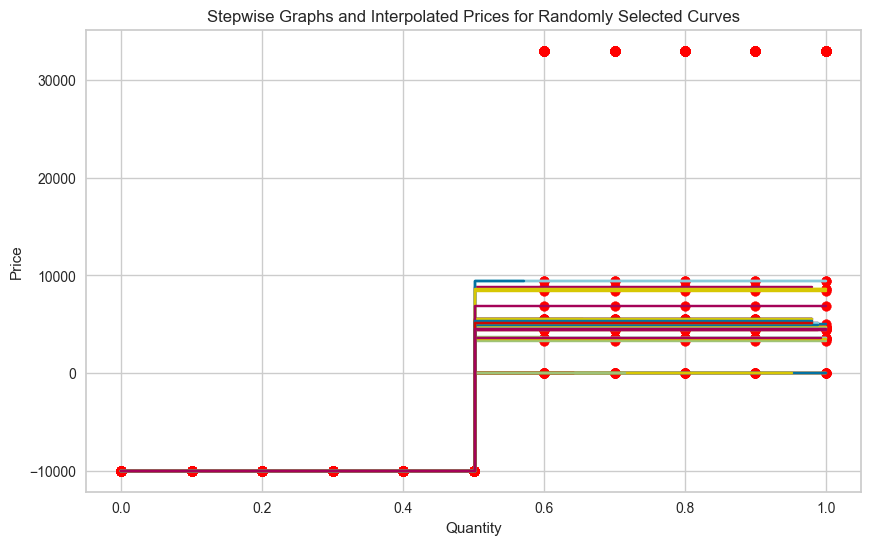

In [22]:
# Randomly plot 100 stepwise curve on a single graph
import random

# Select 100 random indices
random_indices = random.sample(range(len(all_quantities)), 100)

# Plot selected curves on a single graph
plt.figure(figsize=(10, 6))

for index in tqdm(random_indices, desc='Processing'):
    quantities, prices, intp_quantities, intp_prices = all_quantities[index], all_prices[index], all_intp_quantities[index], all_intp_prices[index]
    plt.step(quantities, prices, where='pre')
    plt.scatter(intp_quantities, intp_prices, color='red')

# Customize the plot as needed
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Stepwise Graphs and Interpolated Prices for Randomly Selected Curves')
plt.legend()
plt.show()


# K-Means Clustering

In [23]:
# Create a DataFrame with the original data and cluster labels
price_series_df = pd.DataFrame(price_series, columns=[f'Feature_{i+1}' for i in range(price_series.shape[1])])

In [24]:
price_series_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11
0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,33000.0,33000.0,33000.0,33000.0,33000.0
1,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,33000.0,33000.0,33000.0,33000.0,33000.0
2,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,33000.0,33000.0,33000.0,33000.0,33000.0
3,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,33000.0,33000.0,33000.0,33000.0,33000.0
4,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,33000.0,33000.0,33000.0,33000.0,33000.0


## Identify best number of clusters

In [25]:
wcss = {} ## Within-Cluster Sum of Square
ssc = {}
calinski_score = {}
davies_score = {}
K = range(2,16)

for k in tqdm(K, desc='Clustering Progress'):
    #Building and fitting the model
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10).fit(price_series_df)
    kmeans_model.fit(price_series_df)

    wcss[k] = kmeans_model.inertia_ ### sum of squared distances to closest cluster center
    ssc[k] = silhouette_score(price_series_df, kmeans_model.labels_, metric='euclidean')
    davies_score[k] = davies_bouldin_score(price_series_df, kmeans_model.labels_)

Clustering Progress: 100%|█████████████████████████████████████████████████████████████████████████████| 14/14 [19:24<00:00, 83.19s/it]


### Visual Method

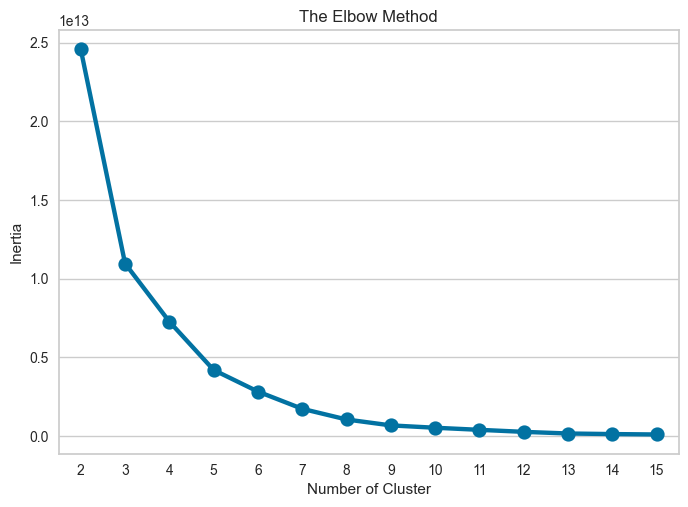

In [26]:
# Check results of elbow method

plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [27]:
# Locate the knee or elbow
cost_kneed = KneeLocator(x = K , y = list(wcss.values()) , S = 1.0 , curve = 'convex' , direction = 'decreasing' , online = True)
suggested_cluster = cost_kneed.elbow
print('Elbow at k = {} clusters'.format(suggested_cluster))

Elbow at k = 5 clusters


### Mathematical Method

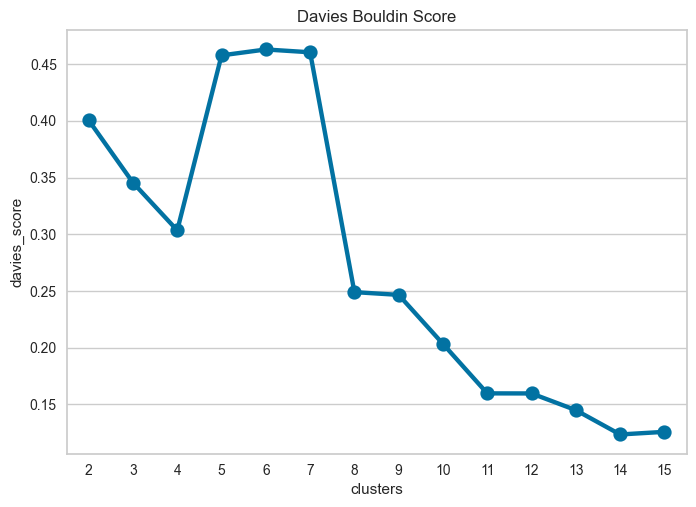

In [28]:
# Create plot for Davies-Bouldin score

plt.title('Davies Bouldin Score')
plt.xlabel('clusters')
plt.ylabel('davies_score')
sns.pointplot(x=list(davies_score.keys()), y=list(davies_score.values()))
plt.show()

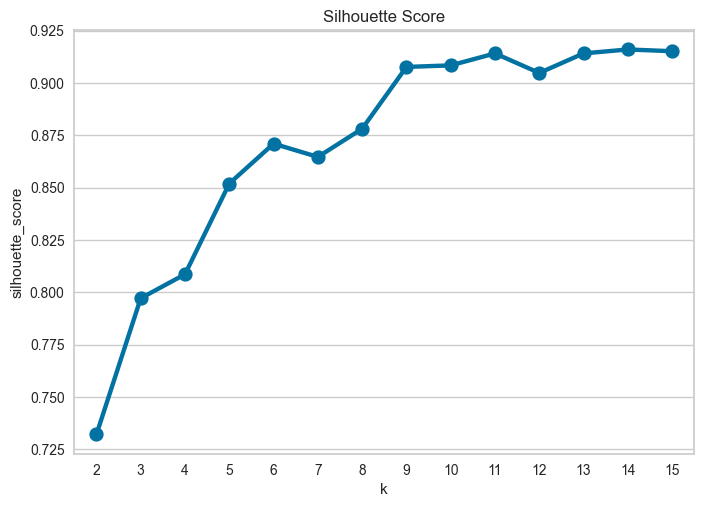

In [29]:
# Create plot for silhouette score

plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('silhouette_score')
sns.pointplot(x=list(ssc.keys()), y=list(ssc.values()))
plt.show()

In [30]:
# Create function for silhouette plot

def silhouette_plot(X , n_list):
    silhouette_scores = []
    for k in tqdm(n_list, desc='Progress'):
        #Instantiate model in k clusters
        model = KMeans(n_clusters = k, random_state=42, n_init=10)
        #Instantiate Visualizer model of with k clusters
        visualizer = SilhouetteVisualizer(model)
        #Fit data to the model
        visualizer.fit(X)
        #Draw data
        visualizer.poof()
        #Append score
        silhouette_scores.append([visualizer.silhouette_score_ , k])
    return silhouette_scores

Progress:   0%|                                                                                                  | 0/1 [00:00<?, ?it/s]

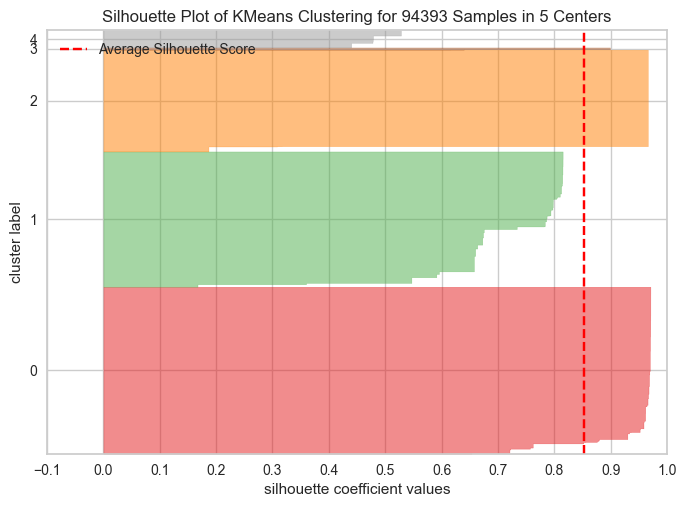

Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [02:52<00:00, 172.92s/it]


[[0.8519676507105186, 5]]

In [31]:
# Create silhouette plot

k_cluster_test = [5]

silhouette_plot(price_series_df , k_cluster_test)

## Clustering with chosen k

In [135]:
# Number of clusters (you can choose an appropriate value for your case)
n_clusters = 5

# Initialize K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(price_series)

# Get cluster labels
cluster_labels = kmeans.labels_

C:\Users\Francia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Snake plot

C:\Users\Francia\AppData\Local\Temp\ipykernel_31468\3315188144.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='variable', y='value', hue='Cluster_Labels', data=df_melted, marker='o', ci=None)
C:\Users\Francia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Francia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Francia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.t

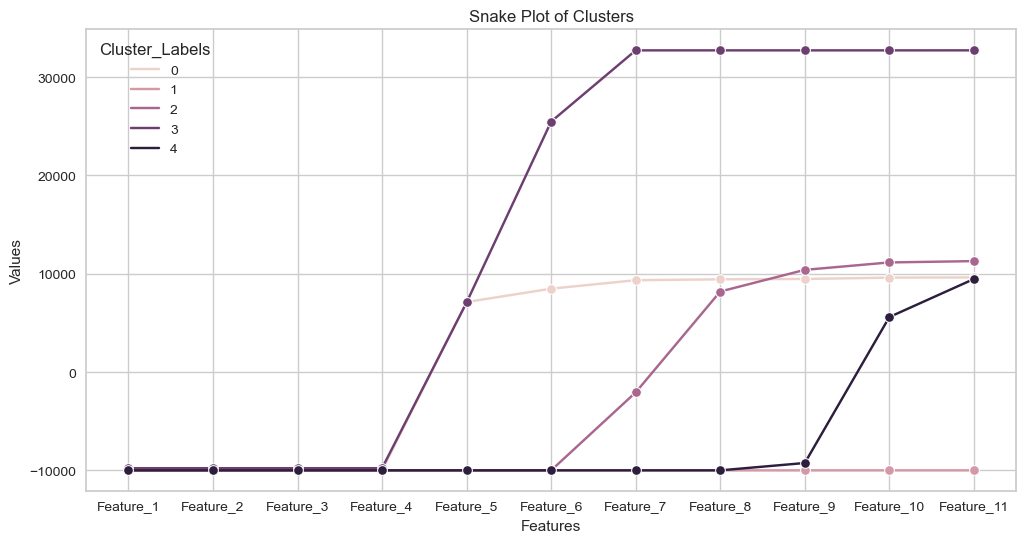

In [96]:
price_series_df['Cluster_Labels'] = cluster_labels

# Melt the DataFrame for the snake plot
df_melted = pd.melt(price_series_df, id_vars='Cluster_Labels', value_vars=price_series_df.columns[:-1])

# Create a snake plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='variable', y='value', hue='Cluster_Labels', data=df_melted, marker='o', ci=None)
plt.title('Snake Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

### TSNE graph

In [127]:
price_series_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Cluster_Labels
0,-10000.0,-10000.0,-10000.0,-10000.0,2854.00,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,0
1,-10000.0,-10000.0,-10000.0,-10000.0,2854.00,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,0
2,-10000.0,-10000.0,-10000.0,-10000.0,2854.00,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,0
3,-10000.0,-10000.0,-10000.0,-10000.0,2854.00,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,0
4,-10000.0,-10000.0,-10000.0,-10000.0,2854.00,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95716,-10000.0,-10000.0,-10000.0,-10000.0,9200.08,9200.08,9260.08,9280.08,9280.08,9300.08,9300.08,0
95717,-10000.0,-10000.0,-10000.0,-10000.0,9200.08,9200.08,9260.08,9280.08,9280.08,9300.08,9300.08,0
95718,-10000.0,-10000.0,-10000.0,-10000.0,9200.08,9200.08,9260.08,9280.08,9280.08,9300.08,9300.08,0
95719,-10000.0,-10000.0,-10000.0,-10000.0,9200.08,9200.08,9260.08,9280.08,9280.08,9300.08,9300.08,0


In [129]:
price_series_df['Cluster_Labels'].value_counts()

Cluster_Labels
2    28492
4    24297
1    24246
0    12318
3     6368
Name: count, dtype: int64

C:\Users\Francia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Francia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Francia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Francia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

<Axes: title={'center': 'Flattened Graph of 5 Clusters'}>

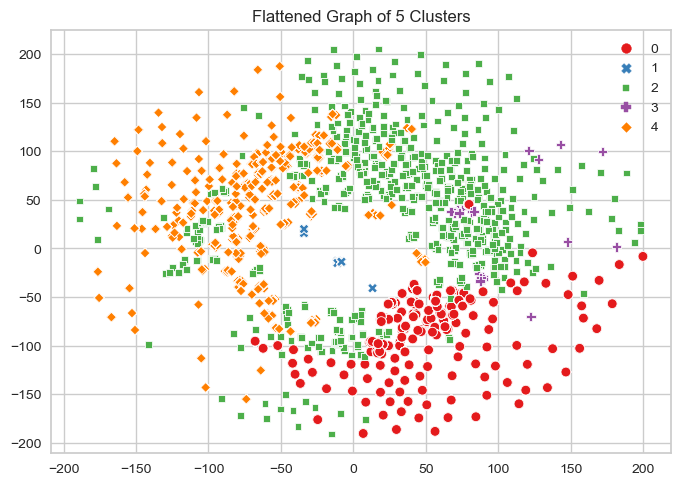

In [137]:
# Initialise TSNE
model = TSNE(random_state=1)
transformed = model.fit_transform(price_series_df)

# Plot t-SNE
plt.title('Flattened Graph of {} Clusters'.format(n_clusters))
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

In [136]:
transformed_df = pd.DataFrame({
    'x_column': transformed[:, 0],
    'y_column': transformed[:, 1],
    'cluster_labels': cluster_labels
})
transformed_df['cluster_labels'].value_counts()

cluster_labels
2    28492
4    24297
1    24246
0    12318
3     6368
Name: count, dtype: int64

### Count plot

C:\Users\Francia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Francia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Francia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Francia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

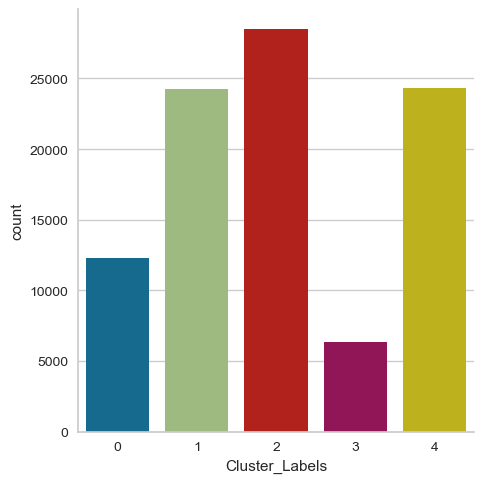

In [97]:
sns.catplot(
    data=price_series_df,
    x="Cluster_Labels",
    kind="count"
  )
plt.show()

## Stepwise Clustering

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:52<00:00,  8.67s/it]


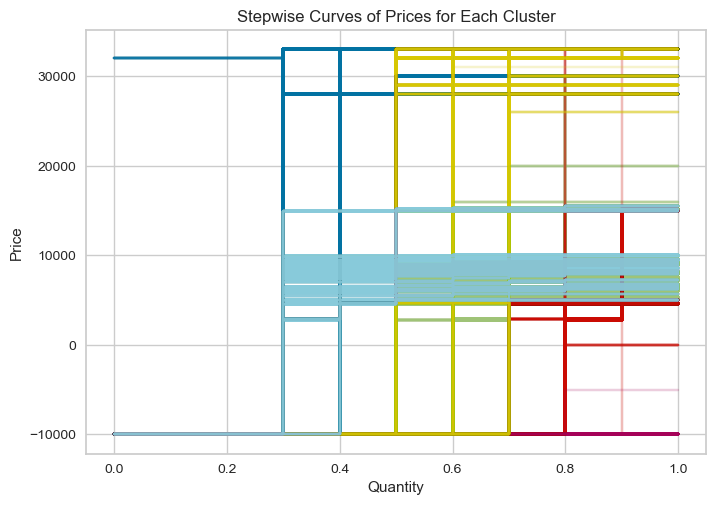

In [37]:
# Define the quantity step
quantity_step = 0.1

# Define the range of quantities from 0 to 1 with the specified step
quantities = np.arange(0, 1.1, quantity_step)

# Extract the price columns
price_columns = [f'Feature_{i}' for i in range(1, 12)]

# Group by cluster labels
grouped_clusters = price_series_df.groupby('Cluster_Labels')

# Plot stepwise curves for each cluster
for cluster, group in tqdm(grouped_clusters):
    # Select the first 10000 curves or all if less than 10000
    group = group.head(10000) if len(group) >= 10000 else group
    
    # Plot stepwise curves
    for index, row in group.iterrows():
        prices = row[price_columns]
        plt.step(quantities, prices, where='pre', color=f'C{cluster}', alpha=0.1, label=f'Cluster {cluster}')

# Customize the plot
plt.xlabel('Quantity')
plt.ylabel('Price')
#plt.legend(title='Clusters')
plt.title('Stepwise Curves of Prices for Each Cluster')
plt.show()


## Time Distribution Attempt

### Create a separate time distribution dataframe

In [98]:
time_distribution = df_2022.copy()

In [99]:
time_distribution.reset_index(drop=True, inplace=True)
time_distribution.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,01/01/2022,-10000.0,-10000.0,2854.0,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,...,0.386399,0.426893,0.550232,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,01/01/2022 12:05:00 AM,-10000.0,-10000.0,2854.0,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,...,0.386399,0.426893,0.550232,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,01/01/2022 12:10:00 AM,-10000.0,-10000.0,2854.0,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,...,0.386399,0.426893,0.550232,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,01/01/2022 12:15:00 AM,-10000.0,-10000.0,2854.0,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,...,0.386399,0.426893,0.550232,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,01/01/2022 12:20:00 AM,-10000.0,-10000.0,2854.0,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,...,0.386399,0.426893,0.550232,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [100]:
time_distribution = time_distribution[['run_time', 'price1']]
time_distribution.head()

,run_time,price1
0,01/01/2022,-10000.0
1,01/01/2022 12:05:00 AM,-10000.0
2,01/01/2022 12:10:00 AM,-10000.0
3,01/01/2022 12:15:00 AM,-10000.0
4,01/01/2022 12:20:00 AM,-10000.0


In [101]:
# Assuming df is your DataFrame
split_values = time_distribution['run_time'].str.split(' ', n=1, expand=True)
time_distribution['date'] = split_values[0]
time_distribution['time'] = split_values[1].fillna('12:00:00 AM')
time_distribution.head()

,run_time,price1,date,time
0,01/01/2022,-10000.0,01/01/2022,12:00:00 AM
1,01/01/2022 12:05:00 AM,-10000.0,01/01/2022,12:05:00 AM
2,01/01/2022 12:10:00 AM,-10000.0,01/01/2022,12:10:00 AM
3,01/01/2022 12:15:00 AM,-10000.0,01/01/2022,12:15:00 AM
4,01/01/2022 12:20:00 AM,-10000.0,01/01/2022,12:20:00 AM


In [102]:
time_distribution = time_distribution.drop(columns = ['run_time', 'price1'])
time_distribution.head()

,date,time
0,01/01/2022,12:00:00 AM
1,01/01/2022,12:05:00 AM
2,01/01/2022,12:10:00 AM
3,01/01/2022,12:15:00 AM
4,01/01/2022,12:20:00 AM


In [103]:
time_distribution['cluster_labels'] = cluster_labels
time_distribution.head()

,date,time,cluster_labels
0,01/01/2022,12:00:00 AM,0
1,01/01/2022,12:05:00 AM,0
2,01/01/2022,12:10:00 AM,0
3,01/01/2022,12:15:00 AM,0
4,01/01/2022,12:20:00 AM,0


In [104]:
#time_distribution['date'] = pd.to_datetime(time_distribution['date'])
#-- didn't push through with converting the date column to datetime kasi for some reason nawawala yung ibang months (see above block)

time_distribution['time'] = pd.to_datetime(time_distribution['time'], format='%I:%M:%S %p')
time_distribution['time'] = time_distribution['time'].dt.time

time_distribution.head()

,date,time,cluster_labels
0,01/01/2022,00:00:00,0
1,01/01/2022,00:05:00,0
2,01/01/2022,00:10:00,0
3,01/01/2022,00:15:00,0
4,01/01/2022,00:20:00,0


In [105]:
time_distribution['date'].value_counts()

date
12/20/2022    310
01/01/2022    288
8/4/2022      288
8/11/2022     288
8/10/2022     288
             ... 
02/27/2022    152
10/30/2022    130
12/26/2022    108
11/27/2022    104
9/11/2022     101
Name: count, Length: 337, dtype: int64

In [106]:
time_distribution['time'].value_counts()

time
18:20:00    357
16:25:00    335
16:30:00    335
16:35:00    335
16:40:00    335
           ... 
08:25:00    330
08:50:00    330
10:50:00    329
01:30:00    329
08:40:00    329
Name: count, Length: 288, dtype: int64

In [108]:
time_distribution['date'] = pd.to_datetime(time_distribution['date'])
time_distribution['date'].value_counts()

date
2022-12-20    310
2022-01-01    288
2022-08-04    288
2022-08-11    288
2022-08-10    288
             ... 
2022-02-27    152
2022-10-30    130
2022-12-26    108
2022-11-27    104
2022-09-11    101
Name: count, Length: 337, dtype: int64

In [111]:
time_distribution['month_year'] = time_distribution['date'].dt.to_period('M')
time_distribution['month_year'].value_counts()

month_year
2022-01    8928
2022-07    8925
2022-05    8910
2022-08    8907
2022-03    8898
2022-04    8636
2022-06    8623
2022-11    8227
2022-12    8194
2022-09    8047
2022-02    7064
2022-10    2362
Freq: M, Name: count, dtype: int64

In [123]:
# Convert time into number of minutes since 0:00:00
time_distribution['time'] = time_distribution['time'].astype(str)
time_distribution['time'] = pd.to_datetime(time_distribution['time'], format='%H:%M:%S').dt.time
time_distribution['time_minutes'] = time_distribution['time'].apply(lambda x: x.hour * 60 + x.minute)

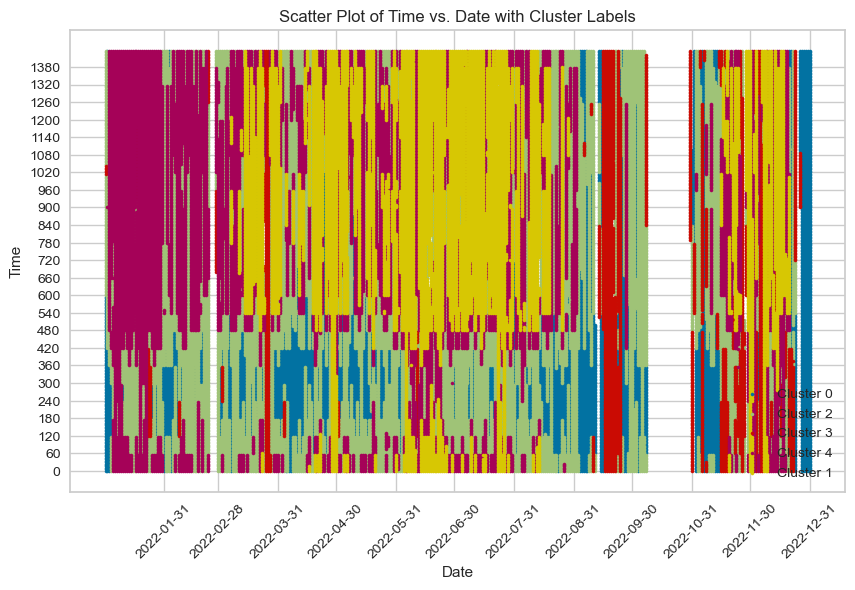

In [124]:
%%time
# Plot scatter plot
plt.figure(figsize=(10, 6))

# Use scatter plot with different colors for each cluster label
for cluster_labels in time_distribution['cluster_labels'].unique():
    cluster_data = time_distribution[time_distribution['cluster_labels'] == cluster_labels]
    plt.scatter(cluster_data['date'], cluster_data['time_minutes'], label=f'Cluster {cluster_labels}', s=5)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Scatter Plot of Time vs. Date with Cluster Labels')
plt.legend()

x_ticks = time_distribution['month_year'].unique()  
y_ticks = time_distribution['time_minutes'].unique()[::12]  
plt.xticks(x_ticks, rotation=45)
plt.yticks(y_ticks)

# Show the plot
plt.show()

In [125]:
# Generate a range of expected dates
expected_dates = pd.date_range(start='2022-01-01', end='2022-12-31')

# Find missing dates by comparing the expected dates with the actual dates
missing_dates = expected_dates[~expected_dates.isin(time_distribution['date'].unique())]

# Print the missing dates
print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex(['2022-02-24', '2022-02-25', '2022-02-26', '2022-09-12',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-12-24', '2022-12-25'],
              dtype='datetime64[ns]', freq=None)
